<a href="https://colab.research.google.com/github/MarcosLopes99/Tech-Challenge-Fase-1/blob/main/TechChallenge1_grupo14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tech Challenge - Fase 1**



# **Grupo 14 - Alunos**

* Daniel Gurgel figueiredo Suárez - RM354088
* Marcelo Henriques da Fonseca - RM353865
* Marcos Lopes da Silva Junior - RM353763
* Ricardo Báfica Pontes - RM353866

# **O problema:**
- Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro saúde.  
- A base de dados para este desafio pode ser algo como indicado no exemplo codigo1.csv. Você precisa apenas alimenta-la com mais informações ou utilizar uma outra de sua preferência.  

# **Tarefas a executar:**
1. Exploração de dados:  
    - Carregue a base de dados e explore suas características.  
    - Analise estatísticas descritivas e visualize distribuições relevantes.  

2. Pré-processamento de dados:  
    - Realize a limpeza dos dados, tratando valores ausentes (se necessário).  
    - Converta variáveis categóricas em formatos adequados para modelagem.  

3. Modelagem:  
    - Crie um modelo preditivo de regressão utilizando uma técnica à sua
    - Divida o conjunto de dados em conjuntos de treinamento e teste  

4. Treinamento e avaliação do modelo:  
    - Treine o modelo com o conjunto de treinamento.  

5. Validação estatística:  
    - Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).  

# **O que avaliaremos:**  
- Apresente resultados visuais, como gráficos de previsões vs. valores reais.  
- Elabore um relatório que inclua uma análise dos resultados, insights obtidos e validação estatística.  

# **Observações:**    
- Esperamos que o modelo seja capaz de fazer previsões confiáveis dos custos individuais com base nas caracteristicas fornecidas.



# Carregando os dados

In [41]:
# Importanto bibliotecas
import pandas as pd

# Lendo o arquivo CSV e transformando em um dataframe
df = pd.read_csv('insurance.csv')

# Conhecendo os dados

In [42]:
# Revelando a quantidade de (linhas, colunas) do dataframe
df.shape

(1338, 7)

In [43]:
# Visualizando as 5 primeiras entradas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
# Informações gerais dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Podemos ver que temos alguns dados categóricos como "sex", "smoker" e "region". Se compararmos com o shape dos dados (1338 linhas, 7 colunas), também podemos notar que não existem dados nulos em nenhuma coluna.

# Verificando dados categóricos



In [45]:
# Descrição estatística das colunas categóricas
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [46]:
# Verificando a distribuição entre os sexos nos dados
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

Temos uma disbribuição parecida de homens e mulheres, com um pouco mais de homens.

In [47]:
# Verificando a distribuição de regiões nos dados
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Podemos observar que a região "southeast" possui uma representação um pouco maior dentro da nossa base de dados se comparado as outras regiões.

In [48]:
# Verificando a quantidade de fumantes e não-fumantes
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Temos muito mais não-fumantes do que fumantes.

# Verificando as variáveis numéricas

In [49]:
# Descrição estatistica das colunas numericas
df.describe(include=['number'])

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


As variáveis numéricas são:

- age (idade), bmi (IMC), children (filhos), charges (despesas)



> [NOTA]
> 1. BMI é o acrônimo de body mass index, ou índice de massa corpórea (IMC).
> 2. BMI é um parâmetro adotado pela Organização Mundial de Saúde para calcular o peso recomendado para uma dada pessoa.
> 3. Calcula-se o BMI dividindo o peso de um indivíduo pela sua altura elevada ao quadrado.
> 4. Os valores de BMI recomendados para adultos são:  
- Os valores de BMI recomendado para adultos são:  

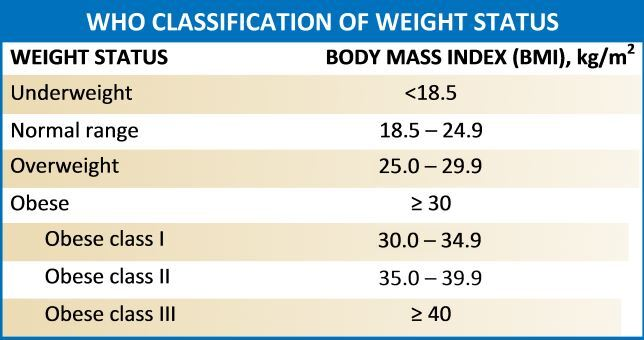

In [50]:
# Criando uma coluna com rótulos de BMI tal como definido pela OMS:

def map_bmi_to_label(bmi_value):
    '''Function que mapeia os valores de IMC para seus rótulos'''
    if bmi_value < 18.5:
        return "Underweight"
    elif 18.5 <= bmi_value < 25.0:
        return "Healthy"
    elif 25.0 <= bmi_value < 30.0:
        return "Overweight"
    elif 30.0 <= bmi_value < 35.0:
        return "Obesity_1"
    elif 35.0 <= bmi_value < 40.0:
        return "Obesity_2"
    else:
        return "Obesity_3"

df["bmi_label"] = df["bmi"].apply(map_bmi_to_label)

# Verificando a quantidade de cada rótulo do BMI
sorter = ['Underweight', 'Healthy', 'Overweight', 'Obesity_1', 'Obesity_2', 'Obesity_3']
df["bmi_label"].value_counts().reindex(sorter)

bmi_label
Underweight     20
Healthy        225
Overweight     386
Obesity_1      391
Obesity_2      225
Obesity_3       91
Name: count, dtype: int64

Observe que nesse conjunto de dados temos uma maior representação de pessoas acima do peso e obesas do que de pessoa saudáveis ou abaixo do peso.

# Verificação de nulos nos dados

In [51]:
# Verificar se existem dados nulos do dataframe
df.isnull().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
bmi_label    0
dtype: int64

Não há dados nulos.

# Verificação de linhas duplicadas dos dados

Verificando existência de linhas duplicadas

In [52]:
# Verificando existência de linhas duplicadas
df.duplicated().sum()

1

In [53]:
# Dropando linhas duplicadas do dataframe
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges,bmi_label
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity_1
2,28,male,33.000,3,no,southeast,4449.46200,Obesity_1
3,33,male,22.705,0,no,northwest,21984.47061,Healthy
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obesity_1
1334,18,female,31.920,0,no,northeast,2205.98080,Obesity_1
1335,18,female,36.850,0,no,southeast,1629.83350,Obesity_2
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


# Visualizando os dados numéricos com auxílio de gráficos

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

## Scatter plot ou gráfico de dispersão

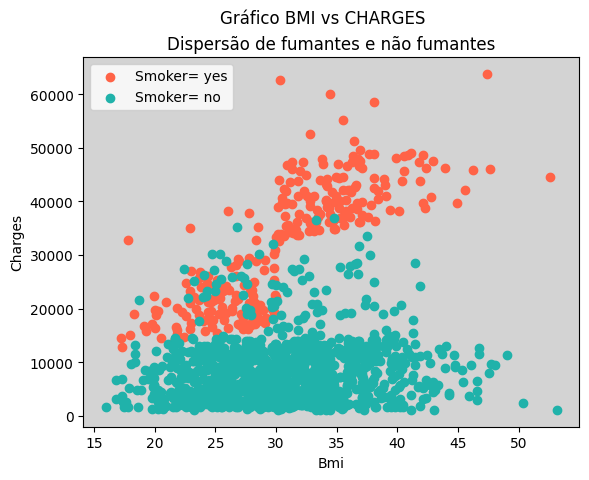

In [55]:
# Avaliação da dispersão de fumantes e não fumantes em gráfico de BMI vs CHARGES
smoker = ['yes', 'no']
color = ['tomato', 'lightseagreen']

# Criando uma figura
fig, ax = plt.subplots(1, 1)

for i in range(2):
    dataset_smoke = df.where(df['smoker'] == smoker[i])
    x = dataset_smoke['bmi']
    y = dataset_smoke['charges']
    plt.scatter(x, y, label=(f"Smoker= {smoker[i]}"), color= color[i])

# Adicionando título e legendas a figura
plt.suptitle('Gráfico BMI vs CHARGES')
plt.title('Dispersão de fumantes e não fumantes')
plt.legend()
plt.xlabel('Bmi')
plt.ylabel('Charges')
ax.set_facecolor("lightgrey")
# plt.show

Observamos que os fumantes, em geral, geraram custos maiores ao seguro de saúde. Pessoas fumantes mas não-obesas, em média, geram custos maiores que os não-fumantes mas menores que os obesos fumantes.

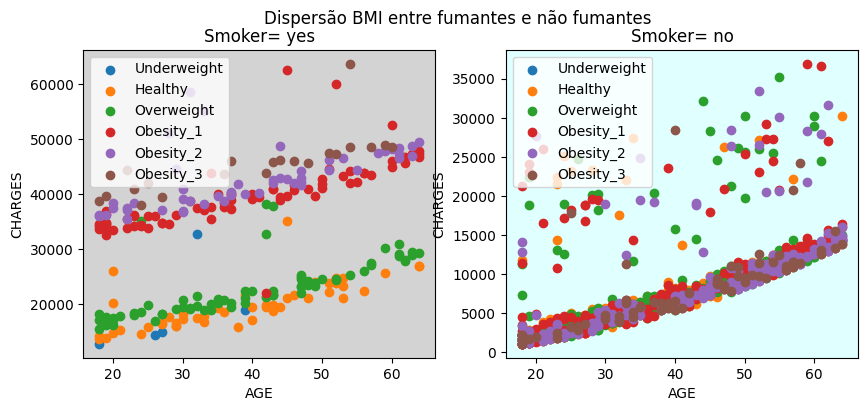

In [56]:
# Avaliação da dispersão de fumantes e não fumantes em gráfico de AGE vs CHARGES
smoker = ['yes', 'no']
bmi_masked = ['Underweight', 'Healthy', 'Overweight', 'Obesity_1', 'Obesity_2', 'Obesity_3']

# Criando figura para 2 subplots (1 linha, 2 colunas)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

for i in range(2):

    for mask in bmi_masked:
        dataset_smoke = df.where(df['smoker'] == smoker[i])
        x = dataset_smoke['age'].where(df['bmi_label'] == mask)
        y = dataset_smoke['charges'].where(df['bmi_label'] == mask)
        ax[i].scatter(x, y, label=mask)
        ax[i].legend()
        ax[i].set_title(f"Smoker= {smoker[i]}")
        ax[i].set_xlabel('AGE')
        ax[i].set_ylabel('CHARGES')

# Adicionando título a figura
ax[0].set_facecolor("lightgrey")
ax[1].set_facecolor("lightcyan")
fig.suptitle('Dispersão BMI entre fumantes e não fumantes')
plt.show()

Os gráficos AGE vs CHARGES indicam o aumento proporcional de custos ao seguro de saúde com o envelhecimento dos indivíduos.  

Observa-se que custos mais altos dos fumantes é ainda mais elevado entre aqueles que possuem algum grau de obesidade.

Assim, compreendemos 3 subgrupos distintos no conjunto de dados:
- um subgrupo de NÃO-FUMANTES
- um subgrupo de FUMANTES e NÃO-OBESOS (UNDERWEIGH, HEALTHY, OVERWEIGH)
- um subgrupo de FUMANTES e OBESOS (Obesity_1, Obesity_2, Obesity_3)

## Histogramas

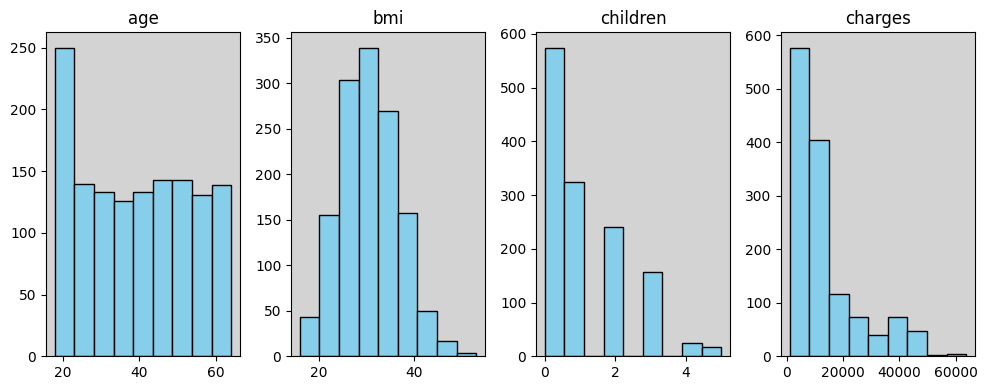

In [57]:
# Usando histogramas para visualizarmos a distribuição dos dados

# Visualização gráfica lado a lado em histograma das variáveis
fig, axs = plt.subplots(1, 4, figsize=(10,4))

# Iteração sobre as colunas do DataFrame
for i, coluna in enumerate(df[["age", "bmi", "children", "charges"]]):
    axs[i].hist(df[coluna], bins=9, align='mid', color='skyblue', edgecolor='black')
    axs[i].set_title(coluna)
    axs[i].set_facecolor("lightgrey")

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

Em "age" podemos verificar que exite uma representação muito maior de pessoas jovens com 20 anos ao menos.

Em "bmi" podemos verificar que a os individuos se distribuem em torno de 30 kg/m2, valor inicial da categoria de obesos.

Em "children" podemos verificar que há uma maior representação em nossos dados de pessoas sem ou com até 1 filho.

Em "charges" podem ver também que em nossos dados há uma maior representação de valores abaixo de 15.000.

## Boxplot

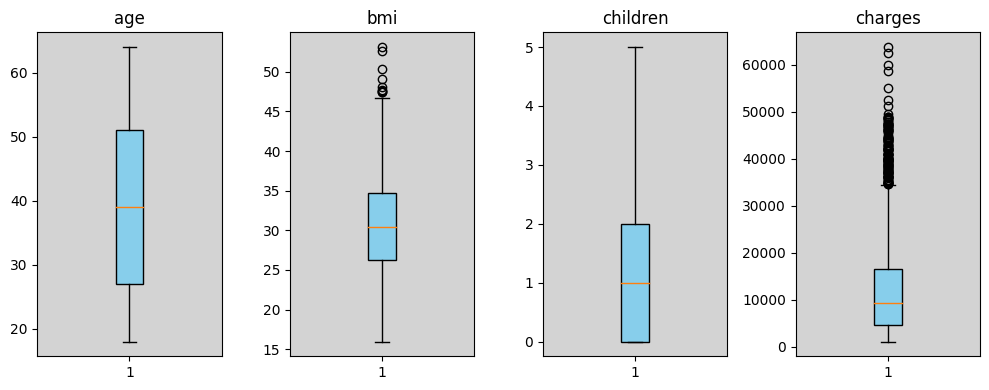

In [58]:
# Visualização gráfica lado a lado em boxplots (diagramas de caixa) das variáveis
fig, axs = plt.subplots(1, 4, figsize=(10,4))

# Iteração sobre as colunas do DataFrame
for i, coluna in enumerate(df[["age", "bmi", "children", "charges"]]):
    axs[i].boxplot(df[coluna], patch_artist=True, boxprops = dict(facecolor = "skyblue"))
    axs[i].set_title(coluna)
    axs[i].set_facecolor("lightgrey")

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

Os boxplots indicam a presenta de outliers nas categorias bmi e charges.

# Correlações

## Matriz de correlação


Aqui usamos da matriz de correlação para verificar se existe correlação entre os dados.

<Axes: >

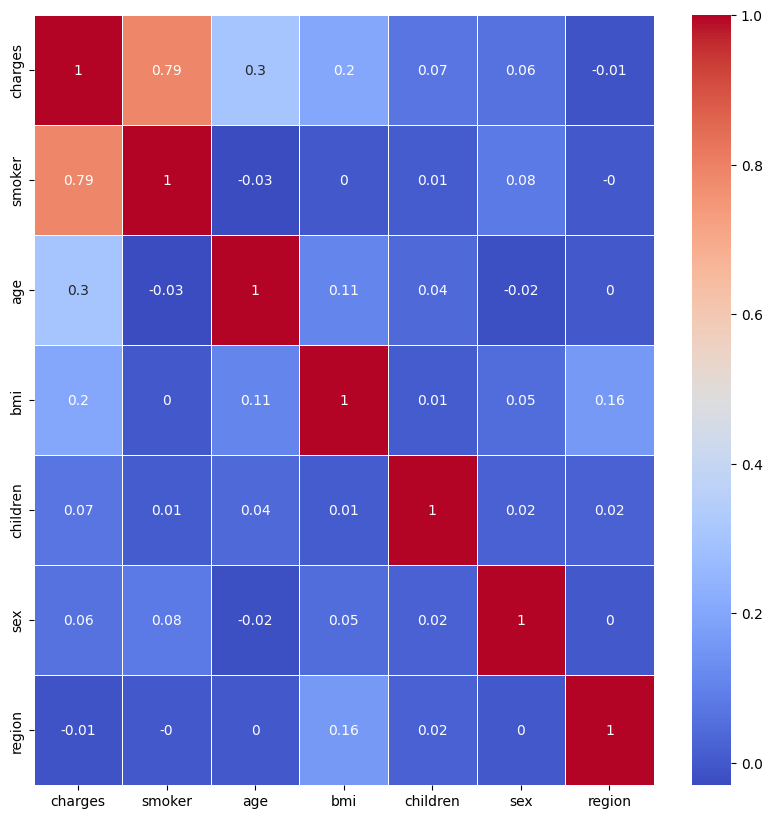

In [19]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Aplicando LabelEncoder em uma cópia do data frame para conseguirmor visualizar os dados categóricos na matriz
label_encoder = LabelEncoder()

df_label_encoded = df

df_label_encoded['sex']     = label_encoder.fit_transform(df['sex'])
df_label_encoded['region']  = label_encoder.fit_transform(df['region'])
df_label_encoded['smoker']  = label_encoder.fit_transform(df['smoker'])

# Criando e mostrando a matriz
numeric_columns = df_label_encoded.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr().round(2)

# Criando uma lista das correlações em ordem decrescente de importancia em relação a CHARGES"
list_importance = correlation_matrix["charges"].sort_values(ascending=False).index.tolist()

# Reordenando a correlation_matrix com a lista de importancia criada
correlation_matrix_ordered = correlation_matrix[list_importance].sort_values(by=list_importance, ascending=False)

# Plotando a matriz de correlação ordenada por importancia
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=correlation_matrix_ordered, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")

Olhando a matriz podemos observar que o valor das despesas médicas tem:
- alta correlação com fumantes
- media correlação com a senioridade e bmi (IMC)

Com isso podemos supor que:
- ser ou não fumante é um fator que pode afetar drásticamente as despesas com contas médicas
- idade e IMC podem ser fatores que afetam as despesas com contas médicas, mas isso não é verdade para todos os casos

## Correlação entre fumantes e despesas

Abaixo plotamos dois gráficos para visualizar a distribuição de despesas entre fumantes e não-fumantes.

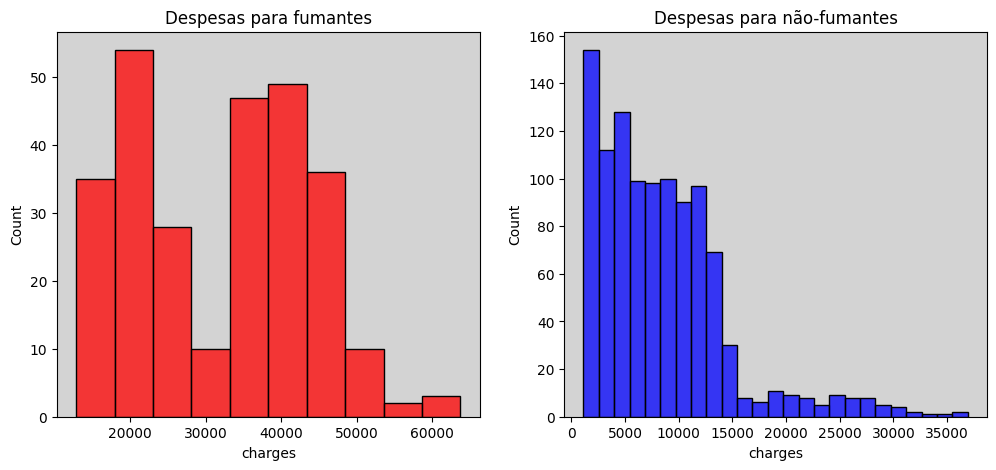

In [20]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.histplot(df_label_encoded[(df_label_encoded.smoker == 1)]["charges"],color='r',ax=ax)
ax.set_title('Despesas para fumantes')
ax.set_facecolor("lightgrey")

ax=f.add_subplot(122)
sns.histplot(df_label_encoded[(df_label_encoded.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Despesas para não-fumantes')
ax.set_facecolor("lightgrey")

Podemos verificar que fumantes, em média, tem muito mais gastos com despesas médicas.

No gráfico "despesas para fumantes" podemos verificar que as despesas médicas já começam em valores mais altos, com um grande número de pessoas em 20.000, e que vão até valores acima de 60.000.

No gráfico "despesas para não-fumantes" podemos verificar que a maior parte das pessoas está concentrada na região que representa despesas médicas abaixo de 15.000. Também podemos ver que o teto desses custos não passa de algo em torno de 40.000, consideravelmente menor que o teto de custos das pessoas fumantes.

# Preparando os dados

## Feature Scaling

Agora aplicamos feature scaling em certas colunas do nosso DataFrame para tratar os dados categóricos.

Como a dimensionalidade original não é tão alta e como não há uma ordem significativa entre as categorias optamos pelo One Hot Encoder.

In [21]:
from sklearn.preprocessing import OneHotEncoder

colunas = ['sex', 'smoker', 'region']

# Criando o encoder e transformando os dados
encoder = OneHotEncoder(sparse=False)

encoded_cols = encoder.fit_transform(df[colunas])

encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(colunas))

# Concatenando novas colunas
df_encoded = pd.concat([df, encoded_df], axis=1)

# Não precisaremos mais das colunas originais já que o OneHotEncoder transformará nossas colunas categóricas em colunas numéricas
colunas_drop = ['sex', 'smoker', 'region', 'bmi_label']

# Drop das colunas especificadas
df_encoded = df_encoded.drop(columns=colunas_drop)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Eliminando linhas duplicadas

Tanto do dataframe original, quanto do datafame com os dados categóricos já tratados.

In [22]:
df = df.drop_duplicates()
df_encoded = df_encoded.drop_duplicates()

In [23]:
# Mostrando nossos dados transformados
df_encoded.head()

,age,bmi,children,charges,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


# Criando, treinando e validando modelos (Parte 1)

## Criando tabela para comparação

In [24]:
import numpy as np
from IPython.display import display

metricas = {
    'Modelo': ['Regressão Linear', 'Árvore de Decisão', 'Random Forest', 'Gradient Boost Machine'],
    'MAE':    [np.nan, np.nan, np.nan, np.nan],
    'MSE':    [np.nan, np.nan, np.nan, np.nan],
    'RMSE':   [np.nan, np.nan, np.nan, np.nan],
    'R²':     [np.nan, np.nan, np.nan, np.nan]
}

# Criar o DataFrame
df_resultados = pd.DataFrame(metricas)

# Mostrar o DataFrame
display(df_resultados)

,Modelo,MAE,MSE,RMSE,R²
0,Regressão Linear,NaN,NaN,NaN,NaN
1,Árvore de Decisão,NaN,NaN,NaN,NaN
2,Random Forest,NaN,NaN,NaN,NaN
3,Gradient Boost Machine,NaN,NaN,NaN,NaN


## Criando função para treinar e avaliar modelos

In [25]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

def treina_e_avalia_modelo_e_retorna_pred(X_train, X_test, y_train, y_test, model):
    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões
    y_pred = model.predict(X_test)

    # Calcular métricas de desempenho usando validação cruzada com 5 folds
    mae_scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error', cv=5)
    mse_scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-mse_scores)
    r2_scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=5)

    # Imprimir métricas de desempenho médias
    print("Relatório:\n")
    print("Métricas de Desempenho Médias (Validação Cruzada - 5 folds)")
    print(f"Erro Médio Absoluto (MAE): {-mae_scores.mean()}")
    print(f"Erro Quadrático Médio (MSE): {-mse_scores.mean()}")
    print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse_scores.mean()}")
    print(f"Coeficiente de Determinação (R²): {r2_scores.mean()}")

    metricas = [-mae_scores.mean(), -mse_scores.mean(), rmse_scores.mean(), r2_scores.mean()]

    return y_pred, metricas

## Separando dados em treino e teste

In [26]:
from sklearn.model_selection import train_test_split

# Separar os dados em features (X) e variável alvo (Y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Padronização

Padronizando os dados de nossas colunas com dados numéricos para que o modelo não dê maior importância as colunas com dados de valores maiores.

In [27]:
from sklearn.preprocessing import StandardScaler

# Colunas a serem padronizadas
colunas_padronizar = ['age', 'bmi', 'children']

scaler = StandardScaler()

# Ajustar a escala dos dados de treinamento
X_train[colunas_padronizar] = scaler.fit_transform(X_train[colunas_padronizar])

# Transformar os dados de teste com o scaler ajustado
X_test[colunas_padronizar] = scaler.transform(X_test[colunas_padronizar])

In [28]:
# Mostrando os dados transformados
X_train.head()

,age,bmi,children,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3
896,0.262271,-1.767793,0.766846,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
194,-1.510415,0.603355,-0.897638,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
240,-1.155878,0.972585,0.766846,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1257,1.042253,-0.515048,-0.065396,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
575,1.325883,-0.593345,-0.897638,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [29]:
# Mostrando os dados transformados
X_test.head()

,age,bmi,children,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3
1248,-1.510415,1.491815,-0.897638,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
610,0.545901,-0.230709,-0.065396,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
393,0.687716,0.095664,-0.065396,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
503,-1.439508,-0.085654,-0.897638,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
198,0.829531,-2.096638,-0.897638,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Regressão Linear

In [30]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Inicializar e treinar o modelo de regressão linear múltipla
modelo_linear_regression = LinearRegression()

y_pred_linear_regression, metricas_linear_regression = treina_e_avalia_modelo_e_retorna_pred(X_train, X_test, y_train, y_test, modelo_linear_regression)

# Adicionar resultados no DataFrame de resultados
df_resultados.iloc[0, 1:] = metricas_linear_regression

print("\n")

# Adicionar uma constante aos dados de treinamento (termo de interceptação)
X_train_with_const = sm.add_constant(X_train)

# Treinar o modelo de regressão linear
model = sm.OLS(y_train, X_train_with_const)
results = model.fit()

# Exibir o resumo estatístico do modelo
print(results.summary())

Relatório:

Métricas de Desempenho Médias (Validação Cruzada - 5 folds)
Erro Médio Absoluto (MAE): 4841.35946477614
Erro Quadrático Médio (MSE): 41501785.359403
Raiz do Erro Quadrático Médio (RMSE): 6369.60001147937
Coeficiente de Determinação (R²): 0.7500805501292831


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     393.8
Date:                Thu, 23 May 2024   Prob (F-statistic):          3.62e-311
Time:                        10:24:48   Log-Likelihood:                -10809.
No. Observations:                1069   AIC:                         2.164e+04
Df Residuals:                    1060   BIC:                         2.168e+04
Df Model:                           8                                         
Covariance Type:  

## Árvore de Decisão

Relatório:

Métricas de Desempenho Médias (Validação Cruzada - 5 folds)
Erro Médio Absoluto (MAE): 3113.747382522712
Erro Quadrático Médio (MSE): 36673676.917792454
Raiz do Erro Quadrático Médio (RMSE): 5941.127703792224
Coeficiente de Determinação (R²): 0.7772205676702819




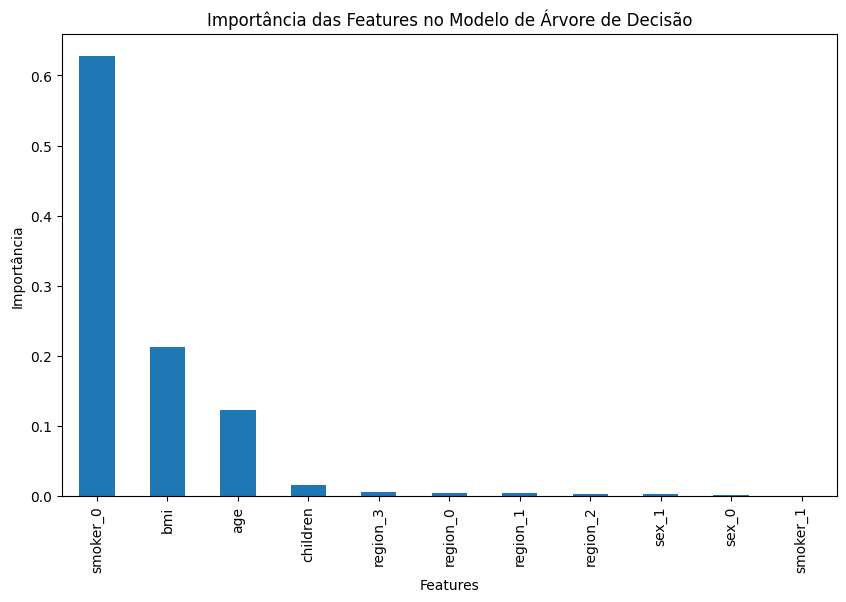

In [31]:
from sklearn.tree import DecisionTreeRegressor

# Inicializar o modelo de Árvore de Decisão para Regressão
modelo_decision_tree = DecisionTreeRegressor(random_state=0)

y_pred_decision_tree, metricas_decision_tree = treina_e_avalia_modelo_e_retorna_pred(X_train, X_test, y_train, y_test, modelo_decision_tree)

# Adicionar resultados no DataFrame de resultados
df_resultados.iloc[1, 1:] = metricas_decision_tree

print("\n")

# Obter a importância das features
dt_feature_importances = modelo_decision_tree.feature_importances_

# Plottando um gráfico para visualizar a importância das features
dt_importances = pd.Series(dt_feature_importances, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
dt_importances.plot(kind='bar')
plt.title('Importância das Features no Modelo de Árvore de Decisão')
plt.xlabel('Features')
plt.ylabel('Importância')
plt.show()

## Random Forest

Relatório:

Métricas de Desempenho Médias (Validação Cruzada - 5 folds)
Erro Médio Absoluto (MAE): 2840.923599309546
Erro Quadrático Médio (MSE): 24411076.812407568
Raiz do Erro Quadrático Médio (RMSE): 4844.431185095548
Coeficiente de Determinação (R²): 0.8518351339513531




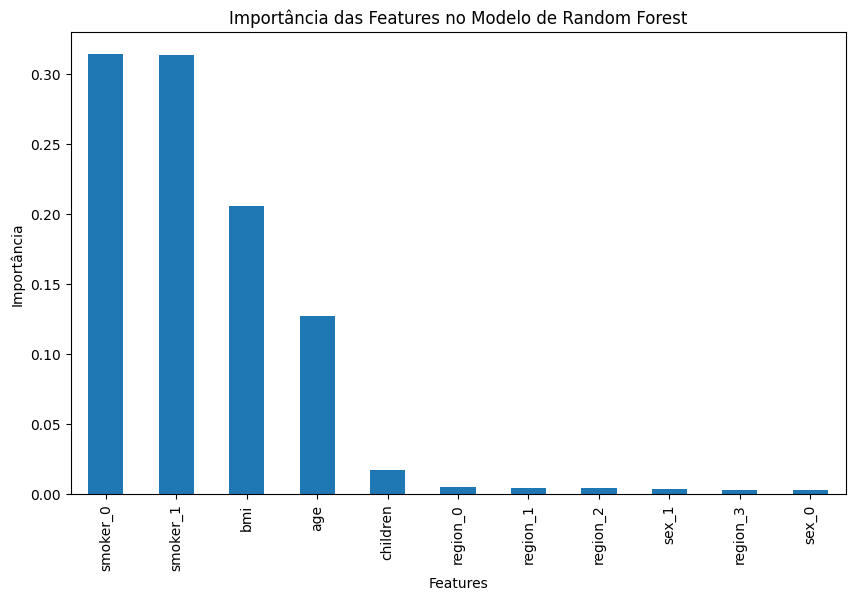

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Inicializar e treinar o modelo de Random Forest para Regressão
modelo_random_forest = RandomForestRegressor(n_estimators=100, random_state=0)

y_pred_random_forest, metricas_random_forest = treina_e_avalia_modelo_e_retorna_pred(X_train, X_test, y_train, y_test, modelo_random_forest)

# Adicionar resultados no DataFrame de resultados
df_resultados.iloc[2, 1:] = metricas_random_forest

print("\n")

# Obter a importância das features
rf_feature_importances = modelo_random_forest.feature_importances_

# Plottando um gráfico para visualizar a importância das features
rf_importances = pd.Series(rf_feature_importances, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
rf_importances.plot(kind='bar')
plt.title('Importância das Features no Modelo de Random Forest')
plt.xlabel('Features')
plt.ylabel('Importância')
plt.show()

## Gradient Boost Machine

Relatório:

Métricas de Desempenho Médias (Validação Cruzada - 5 folds)
Erro Médio Absoluto (MAE): 3263.3042740056867
Erro Quadrático Médio (MSE): 27387993.44776258
Raiz do Erro Quadrático Médio (RMSE): 5098.090247765167
Coeficiente de Determinação (R²): 0.8329369071683891




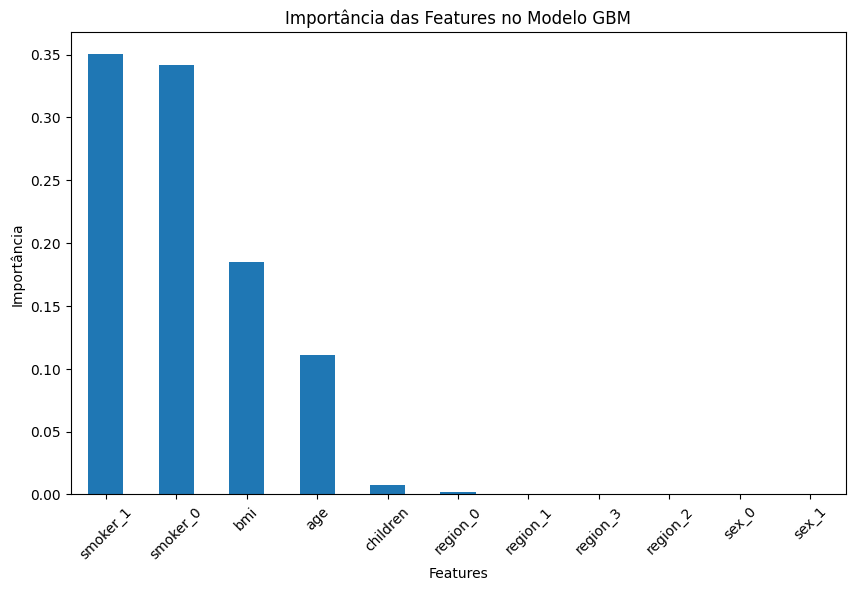

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

# Inicializar e treinar o modelo GBM para regressão
modelo_gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

y_pred_gbm, metricas_gbm = treina_e_avalia_modelo_e_retorna_pred(X_train, X_test, y_train, y_test, modelo_gbm)

# Adicionar resultados no DataFrame de resultados
df_resultados.iloc[3, 1:] = metricas_gbm

print("\n")

# Importância das features no modelo GBM
gbm_feature_importances = modelo_gbm.feature_importances_

# Plottando um gráfico para visualizar a importância das features
gbm_importances = pd.Series(gbm_feature_importances, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
gbm_importances.plot(kind='bar')
plt.title('Importância das Features no Modelo GBM')
plt.xlabel('Features')
plt.ylabel('Importância')
plt.xticks(rotation=45)
plt.show()

## Tabela comparativa

In [34]:
# Mostrar o DataFrame
display(df_resultados)

,Modelo,MAE,MSE,RMSE,R²
0,Regressão Linear,4841.359465,4.150179e+07,6369.600011,0.750081
1,Árvore de Decisão,3113.747383,3.667368e+07,5941.127704,0.777221
2,Random Forest,2840.923599,2.441108e+07,4844.431185,0.851835
3,Gradient Boost Machine,3263.304274,2.738799e+07,5098.090248,0.832937


Com a tabela comparativa acima podemos verificar que os modelos "Random Forest" e "Gradient Boost Machine" obtiveram o melhor desempenho.

## Resultados visuais

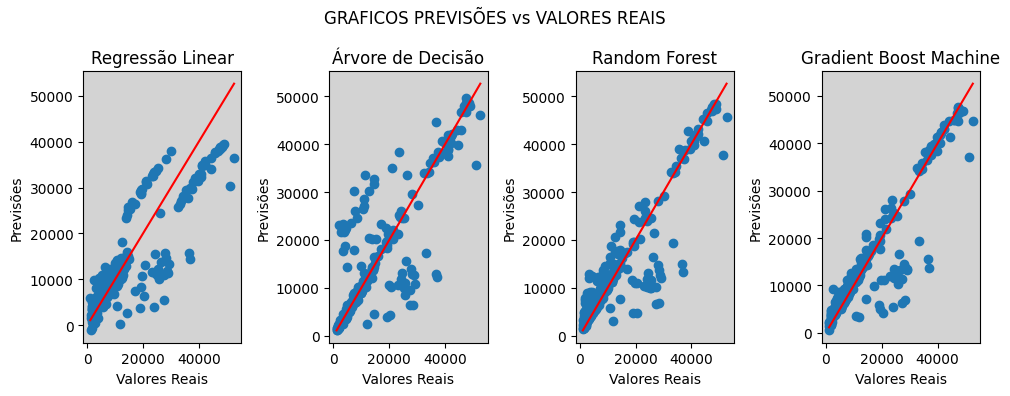

In [35]:
list_of_modelos = [y_pred_linear_regression, y_pred_decision_tree, y_pred_random_forest, y_pred_gbm]
name_of_modelos = ['Regressão Linear', 'Árvore de Decisão', 'Random Forest', 'Gradient Boost Machine']

# visualização gráfica lado a lado em boxplots (diagramas de caixa) das variáveis
fig, axs = plt.subplots(1, 4, figsize=(10,4))

# Iteração sobre a list_of_modelos
for i, modelo in enumerate(list_of_modelos):
    axs[i].scatter(y_test, list_of_modelos[i])
    axs[i].set_title(name_of_modelos[i])
    axs[i].set_xlabel('Valores Reais')
    axs[i].set_ylabel('Previsões')
    axs[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
    axs[i].set_facecolor("lightgrey")

fig.suptitle('GRAFICOS PREVISÕES vs VALORES REAIS')

# Ajustar o layout
plt.tight_layout()

plt.show()

## Análise dos resultados

Verificando a importância das features em cada modelo podemos ver que ser fumante ou não, o IMC e a idade da pessoa são features de grande importância. Já features referentes a região e sexo não aparentam ter tanto importância para a criação do modelo.

Dentre os modelos testados, os que mais se destacaram foram os modelos "Random Forest" e "Gradient Boost Machine", ambos com um R² acima de 80%. Vamos prosseguir com o modelo "Random Forest", já que este apresenta um R² ligeiramente maior e um erro médio ligeiramente menor.

A seguir, vamos novamente treinar e validar um modelo de Random Forest só que retirando as features de menor importância.

# Criando, treinando e validando modelos (Parte 2)

## Drop de colunas de menor importância

In [36]:
colunas_drop_rf = ["sex_0", "sex_1", "region_0", "region_1", "region_2", "region_3"]

X_train_rf = X_train
X_test_rf = X_test

X_train_rf = X_train_rf.drop(columns=colunas_drop_rf)
X_test_rf = X_test_rf.drop(columns=colunas_drop_rf)

In [37]:
# Mostrando os dados
X_train_rf.head()

,age,bmi,children,smoker_0,smoker_1
896,0.262271,-1.767793,0.766846,0.0,1.0
194,-1.510415,0.603355,-0.897638,1.0,0.0
240,-1.155878,0.972585,0.766846,0.0,1.0
1257,1.042253,-0.515048,-0.065396,1.0,0.0
575,1.325883,-0.593345,-0.897638,1.0,0.0


In [38]:
# Mostrando os dados
X_test_rf.head()

,age,bmi,children,smoker_0,smoker_1
1248,-1.510415,1.491815,-0.897638,1.0,0.0
610,0.545901,-0.230709,-0.065396,1.0,0.0
393,0.687716,0.095664,-0.065396,1.0,0.0
503,-1.439508,-0.085654,-0.897638,0.0,1.0
198,0.829531,-2.096638,-0.897638,1.0,0.0


## Treino e validação de modelo Random Forest

In [39]:
# Inicializar e treinar o modelo de Random Forest para Regressão
modelo_random_forest_2 = RandomForestRegressor(n_estimators=100, random_state=0)

y_pred_random_forest_2, metricas_random_forest_2 = treina_e_avalia_modelo_e_retorna_pred(X_train_rf, X_test_rf, y_train, y_test, modelo_random_forest_2)

Relatório:

Métricas de Desempenho Médias (Validação Cruzada - 5 folds)
Erro Médio Absoluto (MAE): 2799.380031169973
Erro Quadrático Médio (MSE): 24033704.10626583
Raiz do Erro Quadrático Médio (RMSE): 4785.649694036595
Coeficiente de Determinação (R²): 0.8534980959307468


Obtivemos resultados ligeiramente melhores.

## Resultado visual

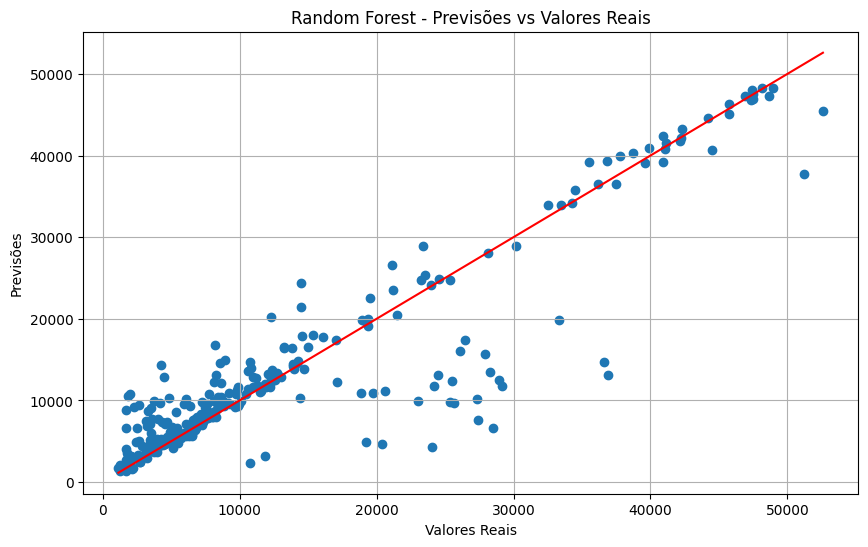

In [40]:
# Visualização gráfica das previsões do Random Forest em relação aos valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_random_forest_2)
plt.title('Random Forest - Previsões vs Valores Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.grid(True)
plt.show()

# Conclusão

A análise dos dados disponíveis proporcionou insights valiosos e revelou padrões notáveis, sintetizados visualmente, sobre o comportamento dos custos de seguro de saúde:


1. Impacto do Tabagismo:
  - Os fumantes geram custos significativamente mais altos ao seguro de saúde. Esses custos são ainda mais elevados quando o fumante apresenta sobrepeso ou obesidade.

2. Influência da Idade:
  - À medida que envelhecem, as pessoas tendem a gerar maiores custos médicos. Esta tendência é exacerbada em indivíduos que fumam ou possuem um Índice de Massa Corporal (IMC) elevado.

3. Número de Filhos:
  - Observou-se que é mais comum as pessoas terem poucos ou nenhum filho, indicando uma predominância de famílias menores.

4. Prevalência do Tabagismo:
  - A proporção de fumantes é consideravelmente menor em comparação aos não fumantes.

5. Fatores Determinantes dos Custos Médicos:
  - Idade, IMC e tabagismo são variáveis com grande influência nos custos das despesas médicas. Esses fatores destacam-se como determinantes primários no aumento dos custos.

6. Influência do Sexo e Região:
  - O sexo biológico e a região de residência do beneficiário não mostraram uma influência significativa nos custos com despesas médicas, sugerindo que esses fatores são menos determinantes na variação dos custos.

Observação:

É importante ressaltar que os insights mencionados referem-se exclusivamente ao conjunto de dados analisado e podem não refletir a realidade de forma abrangente.

## Modelagem de Machine Learning

Com base nos insights obtidos e na análise de diferentes modelos de Machine Learning, desenvolvemos um modelo de Random Forest que demonstrou uma capacidade preditiva robusta. Este modelo apresentou um coeficiente de determinação (R²) de aproximadamente 85% e um erro médio absoluto (MAE) em torno de 2800, indicando uma precisão satisfatória nas previsões dos custos médicos.

Esta análise e os resultados do modelo de Machine Learning podem fornecer uma base sólida para estratégias de mitigação de riscos e otimização de custos no setor de seguros de saúde.